In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import dynamic_tsne
from importlib import reload
reload(dynamic_tsne)  # Rerun this cell after update
%matplotlib inline

# Preparing Datasets

Iris, MNIST and digits. Customer segmentation data is classified, it won't appear.

Iris and digits are toy datasets. Maybe, for tech report.

## Digits Dataset

Will be used only for reference. To replace by MNIST.

In [2]:
# Load data
data_digits = datasets.load_digits()
X_digits = data_digits.images.reshape((-1, 64)) # 8x8 image to 64-length vector
labels_digits = data_digits.target

temp = np.ascontiguousarray(X_digits).view(np.dtype((np.void, X_digits.dtype.itemsize * X_digits.shape[1])))
_, un_idx = np.unique(temp, return_index=True)
X_digits = X_digits[un_idx, :]
labels_digits = labels_digits[un_idx]

In [3]:
# Run TSNE
dTSNE_digits = dynamic_tsne.DynamicTSNE(perplexity=20)
Y_digits = dTSNE_digits.fit(X_digits, optimizer_kwargs={'momentum': 0.8, 'n_iter': 1000}, random_seed=1)

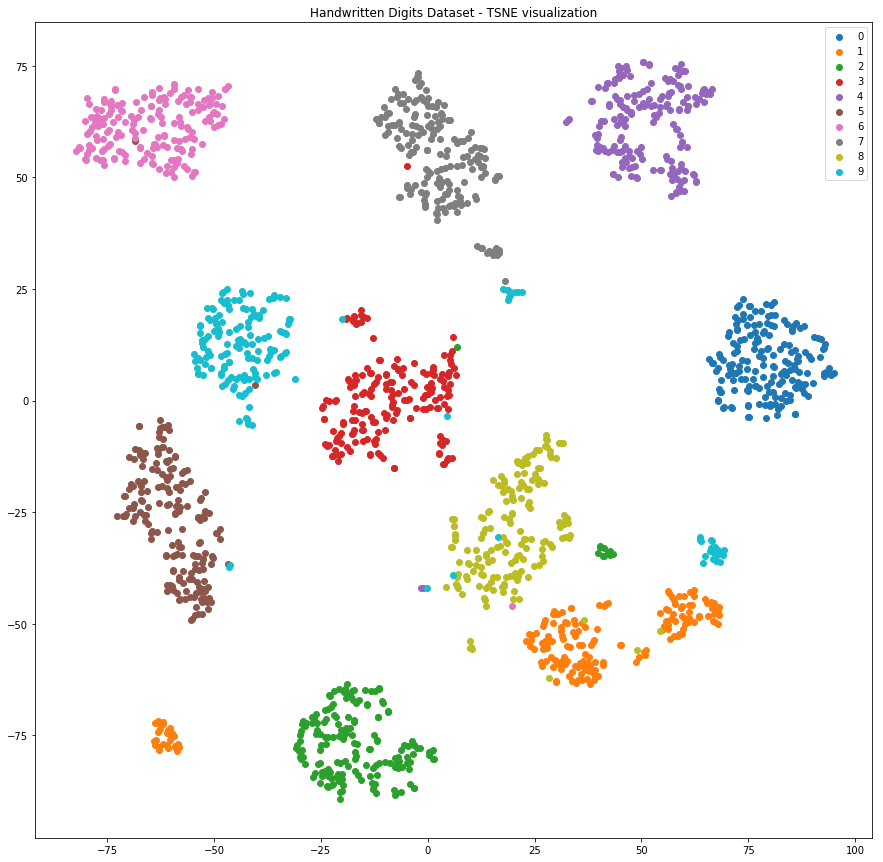

In [4]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
for l in set(sorted(labels_digits)):
    plt.scatter(Y_digits[labels_digits == l, 0], Y_digits[labels_digits == l, 1])
    legend_list.append(str(data_digits.target_names[l]))
plt.title("Handwritten Digits Dataset - TSNE visualization")
plt.legend(legend_list)
plt.show()

In [5]:
#km_digits = KMeans(n_clusters=13, random_state=0)
#km_digits.fit(X_digits)

# Cluster Structure Test

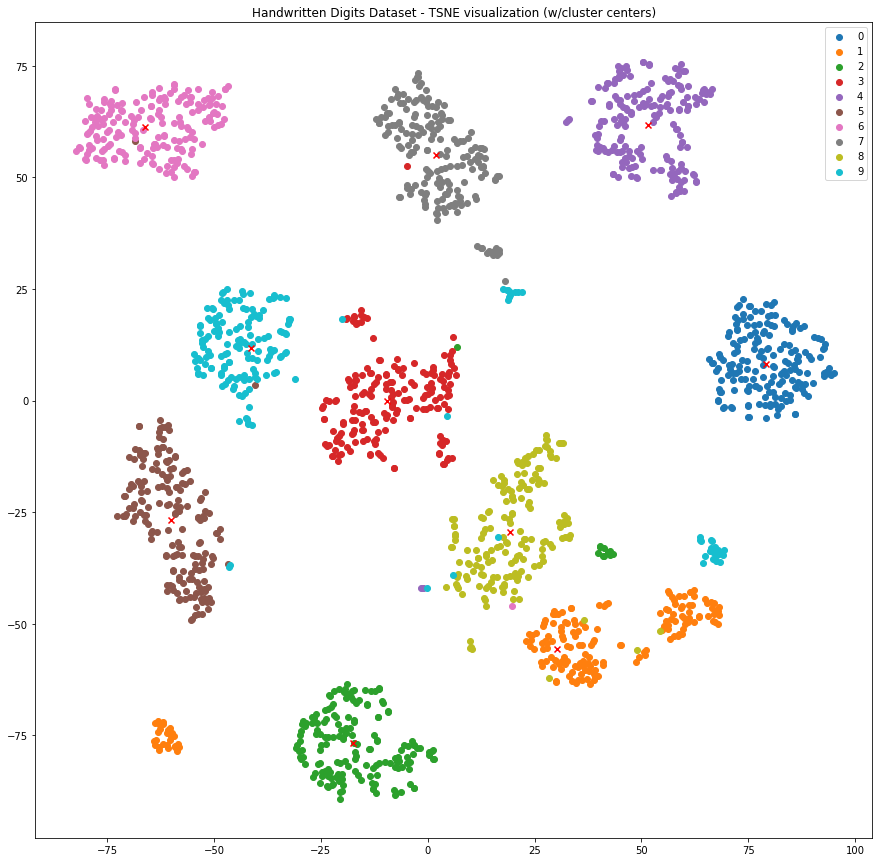

In [6]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
for l in set(sorted(labels_digits)):
    plt.scatter(Y_digits[labels_digits == l, 0], Y_digits[labels_digits == l, 1])
    legend_list.append(str(data_digits.target_names[l]))
centers_y_digits = np.zeros((len(set(labels_digits)),Y_digits.shape[1]))
centers_x_digits = np.zeros((len(set(labels_digits)),X_digits.shape[1]))
# Pick 80% around center
for l in sorted(set(labels_digits)):
    picked_x = X_digits[labels_digits == l, :]
    picked_y = Y_digits[labels_digits==l,:]
    x_center = np.mean(picked_x, axis=0)
    center_dist = np.sqrt(np.sum((picked_x - x_center)**2, axis=1))
    picked_y = picked_y[center_dist < np.percentile(center_dist, 80), :]
    picked_x = picked_x[center_dist < np.percentile(center_dist, 80), :]
    centers_x_digits[l,:] = [np.mean(picked_x[:,i]) for i in range(X_digits.shape[1])]
    centers_y_digits[l,:] = [np.mean(picked_y[:,i]) for i in range(Y_digits.shape[1])]
plt.scatter(centers_y_digits[:,0], centers_y_digits[:,1], c='red', marker='x')
plt.title("Handwritten Digits Dataset - TSNE visualization (w/cluster centers)")
#plt.scatter(Y_digits[[75], 0], Y_digits[[75], 1], marker = 'x', color='black',s=50)
plt.legend(legend_list)
plt.show()

# MNIST Dataset

In [7]:
from tensorflow.examples.tutorials.mnist import input_data

In [8]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
np.random.seed(0)
ind = np.random.choice(np.arange(len(mnist.train.images)), size = 2567) # For 0 random seed 2567 samples have
#exactly 2500 unique ones
X_mnist_raw = mnist.train.images[ind]
labels_mnist = mnist.train.labels[ind]

temp = np.ascontiguousarray(X_mnist_raw).view(np.dtype((np.void, X_mnist_raw.dtype.itemsize * X_mnist_raw.shape[1])))
_, un_idx = np.unique(temp, return_index=True)
X_mnist_raw = X_mnist_raw[un_idx, :]
labels_mnist = labels_mnist[un_idx]

mnist_pca = PCA(n_components=30)
X_mnist = mnist_pca.fit_transform(X_mnist_raw)

labels_mnist_onehot = labels_mnist
labels_mnist = np.argmax(labels_mnist,axis=1)

print(X_mnist.shape)

(2500, 30)


In [10]:
# Run TSNE
dTSNE_mnist = dynamic_tsne.DynamicTSNE(perplexity=30)
Y_mnist = dTSNE_mnist.fit(X_mnist, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                     'early_exaggeration_iters' : 300}, random_seed=1, verbose=2)

Found sigma. Average:  1.44087912976
[t-SNE] Iteration 1: error = 23.7850169, gradient norm = 0.0714645
[t-SNE] Iteration 2: error = 22.7682439, gradient norm = 0.0776627
[t-SNE] Iteration 3: error = 23.6709948, gradient norm = 0.0738562
[t-SNE] Iteration 4: error = 23.7284387, gradient norm = 0.0668445
[t-SNE] Iteration 5: error = 23.4090577, gradient norm = 0.0691734
[t-SNE] Iteration 6: error = 23.0633941, gradient norm = 0.0762285
[t-SNE] Iteration 7: error = 22.8880723, gradient norm = 0.0776093
[t-SNE] Iteration 8: error = 22.7150188, gradient norm = 0.0768266
[t-SNE] Iteration 9: error = 22.3571033, gradient norm = 0.0771289
[t-SNE] Iteration 10: error = 21.9254209, gradient norm = 0.0795476
[t-SNE] Iteration 11: error = 21.5016058, gradient norm = 0.0807121
[t-SNE] Iteration 12: error = 21.0710034, gradient norm = 0.0807356
[t-SNE] Iteration 13: error = 20.5468225, gradient norm = 0.0809021
[t-SNE] Iteration 14: error = 20.1288227, gradient norm = 0.0812450
[t-SNE] Iteration 15

[t-SNE] Iteration 119: error = 1.5671461, gradient norm = 0.0017425
[t-SNE] Iteration 120: error = 1.5577223, gradient norm = 0.0015707
[t-SNE] Iteration 121: error = 1.5485365, gradient norm = 0.0016861
[t-SNE] Iteration 122: error = 1.5389192, gradient norm = 0.0014648
[t-SNE] Iteration 123: error = 1.5306103, gradient norm = 0.0015680
[t-SNE] Iteration 124: error = 1.5228802, gradient norm = 0.0015045
[t-SNE] Iteration 125: error = 1.5151634, gradient norm = 0.0014405
[t-SNE] Iteration 126: error = 1.5073308, gradient norm = 0.0014733
[t-SNE] Iteration 127: error = 1.4992369, gradient norm = 0.0012936
[t-SNE] Iteration 128: error = 1.4917413, gradient norm = 0.0013797
[t-SNE] Iteration 129: error = 1.4846168, gradient norm = 0.0013262
[t-SNE] Iteration 130: error = 1.4775721, gradient norm = 0.0012508
[t-SNE] Iteration 131: error = 1.4706907, gradient norm = 0.0013068
[t-SNE] Iteration 132: error = 1.4639146, gradient norm = 0.0013370
[t-SNE] Iteration 133: error = 1.4571401, gradie

[t-SNE] Iteration 240: error = 1.2197904, gradient norm = 0.0002456
[t-SNE] Iteration 241: error = 1.2190655, gradient norm = 0.0002400
[t-SNE] Iteration 242: error = 1.2183492, gradient norm = 0.0002389
[t-SNE] Iteration 243: error = 1.2176406, gradient norm = 0.0002366
[t-SNE] Iteration 244: error = 1.2169410, gradient norm = 0.0002324
[t-SNE] Iteration 245: error = 1.2162529, gradient norm = 0.0002388
[t-SNE] Iteration 246: error = 1.2155757, gradient norm = 0.0002588
[t-SNE] Iteration 247: error = 1.2149015, gradient norm = 0.0002536
[t-SNE] Iteration 248: error = 1.2142312, gradient norm = 0.0002298
[t-SNE] Iteration 249: error = 1.2135797, gradient norm = 0.0002439
[t-SNE] Iteration 250: error = 1.2129260, gradient norm = 0.0002191
[t-SNE] Iteration 251: error = 1.2122872, gradient norm = 0.0002267
[t-SNE] Iteration 252: error = 1.2116537, gradient norm = 0.0002284
[t-SNE] Iteration 253: error = 1.2110325, gradient norm = 0.0002451
[t-SNE] Iteration 254: error = 1.2104111, gradie

[t-SNE] Iteration 361: error = 1.1700713, gradient norm = 0.0001226
[t-SNE] Iteration 362: error = 1.1698440, gradient norm = 0.0001143
[t-SNE] Iteration 363: error = 1.1696191, gradient norm = 0.0001102
[t-SNE] Iteration 364: error = 1.1693964, gradient norm = 0.0001140
[t-SNE] Iteration 365: error = 1.1691759, gradient norm = 0.0001190
[t-SNE] Iteration 366: error = 1.1689570, gradient norm = 0.0001190
[t-SNE] Iteration 367: error = 1.1687385, gradient norm = 0.0001092
[t-SNE] Iteration 368: error = 1.1685226, gradient norm = 0.0001062
[t-SNE] Iteration 369: error = 1.1683087, gradient norm = 0.0001122
[t-SNE] Iteration 370: error = 1.1680966, gradient norm = 0.0001242
[t-SNE] Iteration 371: error = 1.1678854, gradient norm = 0.0001276
[t-SNE] Iteration 372: error = 1.1676758, gradient norm = 0.0001244
[t-SNE] Iteration 373: error = 1.1674670, gradient norm = 0.0001107
[t-SNE] Iteration 374: error = 1.1672596, gradient norm = 0.0001043
[t-SNE] Iteration 375: error = 1.1670540, gradie

[t-SNE] Iteration 482: error = 1.1512084, gradient norm = 0.0000692
[t-SNE] Iteration 483: error = 1.1511040, gradient norm = 0.0000723
[t-SNE] Iteration 484: error = 1.1510000, gradient norm = 0.0000759
[t-SNE] Iteration 485: error = 1.1508966, gradient norm = 0.0000798
[t-SNE] Iteration 486: error = 1.1507934, gradient norm = 0.0000795
[t-SNE] Iteration 487: error = 1.1506908, gradient norm = 0.0000747
[t-SNE] Iteration 488: error = 1.1505883, gradient norm = 0.0000716
[t-SNE] Iteration 489: error = 1.1504861, gradient norm = 0.0000708
[t-SNE] Iteration 490: error = 1.1503849, gradient norm = 0.0000779
[t-SNE] Iteration 491: error = 1.1502840, gradient norm = 0.0000811
[t-SNE] Iteration 492: error = 1.1501830, gradient norm = 0.0000745
[t-SNE] Iteration 493: error = 1.1500826, gradient norm = 0.0000673
[t-SNE] Iteration 494: error = 1.1499830, gradient norm = 0.0000691
[t-SNE] Iteration 495: error = 1.1498841, gradient norm = 0.0000757
[t-SNE] Iteration 496: error = 1.1497854, gradie

[t-SNE] Iteration 603: error = 1.1415697, gradient norm = 0.0000575
[t-SNE] Iteration 604: error = 1.1415104, gradient norm = 0.0000567
[t-SNE] Iteration 605: error = 1.1414511, gradient norm = 0.0000516
[t-SNE] Iteration 606: error = 1.1413920, gradient norm = 0.0000511
[t-SNE] Iteration 607: error = 1.1413333, gradient norm = 0.0000562
[t-SNE] Iteration 608: error = 1.1412750, gradient norm = 0.0000659
[t-SNE] Iteration 609: error = 1.1412166, gradient norm = 0.0000684
[t-SNE] Iteration 610: error = 1.1411584, gradient norm = 0.0000650
[t-SNE] Iteration 611: error = 1.1411005, gradient norm = 0.0000544
[t-SNE] Iteration 612: error = 1.1410429, gradient norm = 0.0000514
[t-SNE] Iteration 613: error = 1.1409857, gradient norm = 0.0000566
[t-SNE] Iteration 614: error = 1.1409290, gradient norm = 0.0000641
[t-SNE] Iteration 615: error = 1.1408721, gradient norm = 0.0000625
[t-SNE] Iteration 616: error = 1.1408152, gradient norm = 0.0000515
[t-SNE] Iteration 617: error = 1.1407587, gradie

[t-SNE] Iteration 724: error = 1.1358047, gradient norm = 0.0000436
[t-SNE] Iteration 725: error = 1.1357664, gradient norm = 0.0000416
[t-SNE] Iteration 726: error = 1.1357283, gradient norm = 0.0000397
[t-SNE] Iteration 727: error = 1.1356905, gradient norm = 0.0000411
[t-SNE] Iteration 728: error = 1.1356528, gradient norm = 0.0000448
[t-SNE] Iteration 729: error = 1.1356153, gradient norm = 0.0000470
[t-SNE] Iteration 730: error = 1.1355777, gradient norm = 0.0000459
[t-SNE] Iteration 731: error = 1.1355402, gradient norm = 0.0000409
[t-SNE] Iteration 732: error = 1.1355030, gradient norm = 0.0000395
[t-SNE] Iteration 733: error = 1.1354662, gradient norm = 0.0000434
[t-SNE] Iteration 734: error = 1.1354293, gradient norm = 0.0000442
[t-SNE] Iteration 735: error = 1.1353926, gradient norm = 0.0000434
[t-SNE] Iteration 736: error = 1.1353560, gradient norm = 0.0000410
[t-SNE] Iteration 737: error = 1.1353197, gradient norm = 0.0000403
[t-SNE] Iteration 738: error = 1.1352835, gradie

[t-SNE] Iteration 845: error = 1.1319727, gradient norm = 0.0000328
[t-SNE] Iteration 846: error = 1.1319468, gradient norm = 0.0000340
[t-SNE] Iteration 847: error = 1.1319212, gradient norm = 0.0000338
[t-SNE] Iteration 848: error = 1.1318956, gradient norm = 0.0000324
[t-SNE] Iteration 849: error = 1.1318701, gradient norm = 0.0000321
[t-SNE] Iteration 850: error = 1.1318448, gradient norm = 0.0000337
[t-SNE] Iteration 851: error = 1.1318195, gradient norm = 0.0000368
[t-SNE] Iteration 852: error = 1.1317941, gradient norm = 0.0000357
[t-SNE] Iteration 853: error = 1.1317688, gradient norm = 0.0000331
[t-SNE] Iteration 854: error = 1.1317436, gradient norm = 0.0000312
[t-SNE] Iteration 855: error = 1.1317185, gradient norm = 0.0000321
[t-SNE] Iteration 856: error = 1.1316934, gradient norm = 0.0000348
[t-SNE] Iteration 857: error = 1.1316684, gradient norm = 0.0000331
[t-SNE] Iteration 858: error = 1.1316434, gradient norm = 0.0000300
[t-SNE] Iteration 859: error = 1.1316185, gradie

[t-SNE] Iteration 966: error = 1.1290025, gradient norm = 0.0000289
[t-SNE] Iteration 967: error = 1.1289818, gradient norm = 0.0000275
[t-SNE] Iteration 968: error = 1.1289611, gradient norm = 0.0000297
[t-SNE] Iteration 969: error = 1.1289404, gradient norm = 0.0000304
[t-SNE] Iteration 970: error = 1.1289196, gradient norm = 0.0000293
[t-SNE] Iteration 971: error = 1.1288987, gradient norm = 0.0000286
[t-SNE] Iteration 972: error = 1.1288780, gradient norm = 0.0000299
[t-SNE] Iteration 973: error = 1.1288572, gradient norm = 0.0000312
[t-SNE] Iteration 974: error = 1.1288364, gradient norm = 0.0000299
[t-SNE] Iteration 975: error = 1.1288156, gradient norm = 0.0000288
[t-SNE] Iteration 976: error = 1.1287949, gradient norm = 0.0000299
[t-SNE] Iteration 977: error = 1.1287742, gradient norm = 0.0000303
[t-SNE] Iteration 978: error = 1.1287535, gradient norm = 0.0000295
[t-SNE] Iteration 979: error = 1.1287330, gradient norm = 0.0000284
[t-SNE] Iteration 980: error = 1.1287124, gradie

[t-SNE] Iteration 1086: error = 1.1268696, gradient norm = 0.0000380
[t-SNE] Iteration 1087: error = 1.1268537, gradient norm = 0.0000279
[t-SNE] Iteration 1088: error = 1.1268379, gradient norm = 0.0000264
[t-SNE] Iteration 1089: error = 1.1268224, gradient norm = 0.0000331
[t-SNE] Iteration 1090: error = 1.1268068, gradient norm = 0.0000276
[t-SNE] Iteration 1091: error = 1.1267912, gradient norm = 0.0000234
[t-SNE] Iteration 1092: error = 1.1267757, gradient norm = 0.0000296
[t-SNE] Iteration 1093: error = 1.1267600, gradient norm = 0.0000293
[t-SNE] Iteration 1094: error = 1.1267441, gradient norm = 0.0000275
[t-SNE] Iteration 1095: error = 1.1267279, gradient norm = 0.0000324
[t-SNE] Iteration 1096: error = 1.1267107, gradient norm = 0.0000361
[t-SNE] Iteration 1097: error = 1.1266913, gradient norm = 0.0000335
[t-SNE] Iteration 1098: error = 1.1266683, gradient norm = 0.0000335
[t-SNE] Iteration 1099: error = 1.1266437, gradient norm = 0.0000335
[t-SNE] Iteration 1100: error = 1.

[t-SNE] Iteration 1205: error = 1.1251793, gradient norm = 0.0000260
[t-SNE] Iteration 1206: error = 1.1251663, gradient norm = 0.0000245
[t-SNE] Iteration 1207: error = 1.1251536, gradient norm = 0.0000264
[t-SNE] Iteration 1208: error = 1.1251408, gradient norm = 0.0000283
[t-SNE] Iteration 1209: error = 1.1251279, gradient norm = 0.0000263
[t-SNE] Iteration 1210: error = 1.1251150, gradient norm = 0.0000248
[t-SNE] Iteration 1211: error = 1.1251021, gradient norm = 0.0000241
[t-SNE] Iteration 1212: error = 1.1250893, gradient norm = 0.0000247
[t-SNE] Iteration 1213: error = 1.1250765, gradient norm = 0.0000243
[t-SNE] Iteration 1214: error = 1.1250637, gradient norm = 0.0000228
[t-SNE] Iteration 1215: error = 1.1250509, gradient norm = 0.0000228
[t-SNE] Iteration 1216: error = 1.1250382, gradient norm = 0.0000232
[t-SNE] Iteration 1217: error = 1.1250255, gradient norm = 0.0000222
[t-SNE] Iteration 1218: error = 1.1250128, gradient norm = 0.0000220
[t-SNE] Iteration 1219: error = 1.

[t-SNE] Iteration 1324: error = 1.1238337, gradient norm = 0.0000206
[t-SNE] Iteration 1325: error = 1.1238240, gradient norm = 0.0000208
[t-SNE] Iteration 1326: error = 1.1238143, gradient norm = 0.0000195
[t-SNE] Iteration 1327: error = 1.1238045, gradient norm = 0.0000194
[t-SNE] Iteration 1328: error = 1.1237948, gradient norm = 0.0000202
[t-SNE] Iteration 1329: error = 1.1237851, gradient norm = 0.0000207
[t-SNE] Iteration 1330: error = 1.1237754, gradient norm = 0.0000193
[t-SNE] Iteration 1331: error = 1.1237657, gradient norm = 0.0000188
[t-SNE] Iteration 1332: error = 1.1237561, gradient norm = 0.0000199
[t-SNE] Iteration 1333: error = 1.1237465, gradient norm = 0.0000212
[t-SNE] Iteration 1334: error = 1.1237370, gradient norm = 0.0000227
[t-SNE] Iteration 1335: error = 1.1237275, gradient norm = 0.0000222
[t-SNE] Iteration 1336: error = 1.1237179, gradient norm = 0.0000195
[t-SNE] Iteration 1337: error = 1.1237083, gradient norm = 0.0000192
[t-SNE] Iteration 1338: error = 1.

[t-SNE] Iteration 1443: error = 1.1224886, gradient norm = 0.0000369
[t-SNE] Iteration 1444: error = 1.1224683, gradient norm = 0.0000393
[t-SNE] Iteration 1445: error = 1.1224475, gradient norm = 0.0000461
[t-SNE] Iteration 1446: error = 1.1224262, gradient norm = 0.0000367
[t-SNE] Iteration 1447: error = 1.1224048, gradient norm = 0.0000321
[t-SNE] Iteration 1448: error = 1.1223838, gradient norm = 0.0000367
[t-SNE] Iteration 1449: error = 1.1223629, gradient norm = 0.0000355
[t-SNE] Iteration 1450: error = 1.1223414, gradient norm = 0.0000386
[t-SNE] Iteration 1451: error = 1.1223200, gradient norm = 0.0000321
[t-SNE] Iteration 1452: error = 1.1222988, gradient norm = 0.0000311
[t-SNE] Iteration 1453: error = 1.1222773, gradient norm = 0.0000399
[t-SNE] Iteration 1454: error = 1.1222554, gradient norm = 0.0000332
[t-SNE] Iteration 1455: error = 1.1222333, gradient norm = 0.0000303
[t-SNE] Iteration 1456: error = 1.1222110, gradient norm = 0.0000330
[t-SNE] Iteration 1457: error = 1.

[t-SNE] Iteration 1562: error = 1.1210777, gradient norm = 0.0000167
[t-SNE] Iteration 1563: error = 1.1210703, gradient norm = 0.0000166
[t-SNE] Iteration 1564: error = 1.1210627, gradient norm = 0.0000168
[t-SNE] Iteration 1565: error = 1.1210549, gradient norm = 0.0000190
[t-SNE] Iteration 1566: error = 1.1210468, gradient norm = 0.0000187
[t-SNE] Iteration 1567: error = 1.1210384, gradient norm = 0.0000203
[t-SNE] Iteration 1568: error = 1.1210298, gradient norm = 0.0000247
[t-SNE] Iteration 1569: error = 1.1210211, gradient norm = 0.0000365
[t-SNE] Iteration 1570: error = 1.1210120, gradient norm = 0.0000439
[t-SNE] Iteration 1571: error = 1.1210015, gradient norm = 0.0000455
[t-SNE] Iteration 1572: error = 1.1209892, gradient norm = 0.0000262
[t-SNE] Iteration 1573: error = 1.1209778, gradient norm = 0.0000256
[t-SNE] Iteration 1574: error = 1.1209667, gradient norm = 0.0000372
[t-SNE] Iteration 1575: error = 1.1209538, gradient norm = 0.0000219
[t-SNE] Iteration 1576: error = 1.

[t-SNE] Iteration 1681: error = 1.1202197, gradient norm = 0.0000155
[t-SNE] Iteration 1682: error = 1.1202142, gradient norm = 0.0000146
[t-SNE] Iteration 1683: error = 1.1202087, gradient norm = 0.0000143
[t-SNE] Iteration 1684: error = 1.1202033, gradient norm = 0.0000152
[t-SNE] Iteration 1685: error = 1.1201979, gradient norm = 0.0000167
[t-SNE] Iteration 1686: error = 1.1201924, gradient norm = 0.0000155
[t-SNE] Iteration 1687: error = 1.1201870, gradient norm = 0.0000146
[t-SNE] Iteration 1688: error = 1.1201816, gradient norm = 0.0000151
[t-SNE] Iteration 1689: error = 1.1201763, gradient norm = 0.0000157
[t-SNE] Iteration 1690: error = 1.1201709, gradient norm = 0.0000152
[t-SNE] Iteration 1691: error = 1.1201656, gradient norm = 0.0000144
[t-SNE] Iteration 1692: error = 1.1201602, gradient norm = 0.0000151
[t-SNE] Iteration 1693: error = 1.1201549, gradient norm = 0.0000165
[t-SNE] Iteration 1694: error = 1.1201497, gradient norm = 0.0000177
[t-SNE] Iteration 1695: error = 1.

[t-SNE] Iteration 1800: error = 1.1196149, gradient norm = 0.0000132
[t-SNE] Iteration 1801: error = 1.1196102, gradient norm = 0.0000138
[t-SNE] Iteration 1802: error = 1.1196056, gradient norm = 0.0000138
[t-SNE] Iteration 1803: error = 1.1196010, gradient norm = 0.0000129
[t-SNE] Iteration 1804: error = 1.1195964, gradient norm = 0.0000128
[t-SNE] Iteration 1805: error = 1.1195918, gradient norm = 0.0000132
[t-SNE] Iteration 1806: error = 1.1195873, gradient norm = 0.0000135
[t-SNE] Iteration 1807: error = 1.1195827, gradient norm = 0.0000133
[t-SNE] Iteration 1808: error = 1.1195782, gradient norm = 0.0000130
[t-SNE] Iteration 1809: error = 1.1195737, gradient norm = 0.0000134
[t-SNE] Iteration 1810: error = 1.1195692, gradient norm = 0.0000144
[t-SNE] Iteration 1811: error = 1.1195646, gradient norm = 0.0000145
[t-SNE] Iteration 1812: error = 1.1195601, gradient norm = 0.0000132
[t-SNE] Iteration 1813: error = 1.1195556, gradient norm = 0.0000127
[t-SNE] Iteration 1814: error = 1.

[t-SNE] Iteration 1919: error = 1.1191066, gradient norm = 0.0000117
[t-SNE] Iteration 1920: error = 1.1191026, gradient norm = 0.0000119
[t-SNE] Iteration 1921: error = 1.1190987, gradient norm = 0.0000119
[t-SNE] Iteration 1922: error = 1.1190948, gradient norm = 0.0000118
[t-SNE] Iteration 1923: error = 1.1190908, gradient norm = 0.0000120
[t-SNE] Iteration 1924: error = 1.1190869, gradient norm = 0.0000120
[t-SNE] Iteration 1925: error = 1.1190830, gradient norm = 0.0000122
[t-SNE] Iteration 1926: error = 1.1190790, gradient norm = 0.0000118
[t-SNE] Iteration 1927: error = 1.1190751, gradient norm = 0.0000116
[t-SNE] Iteration 1928: error = 1.1190712, gradient norm = 0.0000125
[t-SNE] Iteration 1929: error = 1.1190672, gradient norm = 0.0000139
[t-SNE] Iteration 1930: error = 1.1190633, gradient norm = 0.0000143
[t-SNE] Iteration 1931: error = 1.1190593, gradient norm = 0.0000138
[t-SNE] Iteration 1932: error = 1.1190553, gradient norm = 0.0000121
[t-SNE] Iteration 1933: error = 1.

[t-SNE] Iteration 2038: error = 1.1186645, gradient norm = 0.0000120
[t-SNE] Iteration 2039: error = 1.1186610, gradient norm = 0.0000119
[t-SNE] Iteration 2040: error = 1.1186575, gradient norm = 0.0000115
[t-SNE] Iteration 2041: error = 1.1186539, gradient norm = 0.0000115
[t-SNE] Iteration 2042: error = 1.1186504, gradient norm = 0.0000116
[t-SNE] Iteration 2043: error = 1.1186469, gradient norm = 0.0000117
[t-SNE] Iteration 2044: error = 1.1186434, gradient norm = 0.0000115
[t-SNE] Iteration 2045: error = 1.1186400, gradient norm = 0.0000122
[t-SNE] Iteration 2046: error = 1.1186365, gradient norm = 0.0000123
[t-SNE] Iteration 2047: error = 1.1186330, gradient norm = 0.0000121
[t-SNE] Iteration 2048: error = 1.1186295, gradient norm = 0.0000114
[t-SNE] Iteration 2049: error = 1.1186260, gradient norm = 0.0000115
[t-SNE] Iteration 2050: error = 1.1186226, gradient norm = 0.0000117
[t-SNE] Iteration 2051: error = 1.1186191, gradient norm = 0.0000114
[t-SNE] Iteration 2052: error = 1.

[t-SNE] Iteration 2157: error = 1.1182749, gradient norm = 0.0000110
[t-SNE] Iteration 2158: error = 1.1182718, gradient norm = 0.0000115
[t-SNE] Iteration 2159: error = 1.1182687, gradient norm = 0.0000113
[t-SNE] Iteration 2160: error = 1.1182656, gradient norm = 0.0000109
[t-SNE] Iteration 2161: error = 1.1182625, gradient norm = 0.0000114
[t-SNE] Iteration 2162: error = 1.1182594, gradient norm = 0.0000117
[t-SNE] Iteration 2163: error = 1.1182563, gradient norm = 0.0000110
[t-SNE] Iteration 2164: error = 1.1182532, gradient norm = 0.0000109
[t-SNE] Iteration 2165: error = 1.1182501, gradient norm = 0.0000110
[t-SNE] Iteration 2166: error = 1.1182471, gradient norm = 0.0000109
[t-SNE] Iteration 2167: error = 1.1182440, gradient norm = 0.0000104
[t-SNE] Iteration 2168: error = 1.1182410, gradient norm = 0.0000106
[t-SNE] Iteration 2169: error = 1.1182380, gradient norm = 0.0000111
[t-SNE] Iteration 2170: error = 1.1182350, gradient norm = 0.0000105
[t-SNE] Iteration 2171: error = 1.

[t-SNE] Iteration 2276: error = 1.1179291, gradient norm = 0.0000105
[t-SNE] Iteration 2277: error = 1.1179263, gradient norm = 0.0000111
[t-SNE] Iteration 2278: error = 1.1179236, gradient norm = 0.0000106
[t-SNE] Iteration 2279: error = 1.1179208, gradient norm = 0.0000103
[t-SNE] Iteration 2280: error = 1.1179181, gradient norm = 0.0000106
[t-SNE] Iteration 2281: error = 1.1179153, gradient norm = 0.0000104
[t-SNE] Iteration 2282: error = 1.1179126, gradient norm = 0.0000101
[t-SNE] Iteration 2283: error = 1.1179099, gradient norm = 0.0000102
[t-SNE] Iteration 2284: error = 1.1179072, gradient norm = 0.0000102
[t-SNE] Iteration 2285: error = 1.1179045, gradient norm = 0.0000106
[t-SNE] Iteration 2286: error = 1.1179018, gradient norm = 0.0000099
[t-SNE] Iteration 2287: error = 1.1178991, gradient norm = 0.0000095
[t-SNE] Iteration 2288: error = 1.1178964, gradient norm = 0.0000103
[t-SNE] Iteration 2289: error = 1.1178937, gradient norm = 0.0000106
[t-SNE] Iteration 2290: error = 1.

[t-SNE] Iteration 2395: error = 1.1176195, gradient norm = 0.0000094
[t-SNE] Iteration 2396: error = 1.1176171, gradient norm = 0.0000096
[t-SNE] Iteration 2397: error = 1.1176146, gradient norm = 0.0000099
[t-SNE] Iteration 2398: error = 1.1176122, gradient norm = 0.0000097
[t-SNE] Iteration 2399: error = 1.1176097, gradient norm = 0.0000092
[t-SNE] Iteration 2400: error = 1.1176073, gradient norm = 0.0000095
[t-SNE] Iteration 2401: error = 1.1176048, gradient norm = 0.0000097
[t-SNE] Iteration 2402: error = 1.1176024, gradient norm = 0.0000099
[t-SNE] Iteration 2403: error = 1.1175999, gradient norm = 0.0000093
[t-SNE] Iteration 2404: error = 1.1175975, gradient norm = 0.0000091
[t-SNE] Iteration 2405: error = 1.1175950, gradient norm = 0.0000098
[t-SNE] Iteration 2406: error = 1.1175926, gradient norm = 0.0000100
[t-SNE] Iteration 2407: error = 1.1175902, gradient norm = 0.0000095
[t-SNE] Iteration 2408: error = 1.1175878, gradient norm = 0.0000091
[t-SNE] Iteration 2409: error = 1.

[t-SNE] Iteration 2514: error = 1.1173401, gradient norm = 0.0000095
[t-SNE] Iteration 2515: error = 1.1173379, gradient norm = 0.0000092
[t-SNE] Iteration 2516: error = 1.1173356, gradient norm = 0.0000094
[t-SNE] Iteration 2517: error = 1.1173334, gradient norm = 0.0000094
[t-SNE] Iteration 2518: error = 1.1173312, gradient norm = 0.0000089
[t-SNE] Iteration 2519: error = 1.1173290, gradient norm = 0.0000092
[t-SNE] Iteration 2520: error = 1.1173267, gradient norm = 0.0000090
[t-SNE] Iteration 2521: error = 1.1173245, gradient norm = 0.0000091
[t-SNE] Iteration 2522: error = 1.1173223, gradient norm = 0.0000091
[t-SNE] Iteration 2523: error = 1.1173201, gradient norm = 0.0000091
[t-SNE] Iteration 2524: error = 1.1173179, gradient norm = 0.0000093
[t-SNE] Iteration 2525: error = 1.1173157, gradient norm = 0.0000092
[t-SNE] Iteration 2526: error = 1.1173135, gradient norm = 0.0000089
[t-SNE] Iteration 2527: error = 1.1173113, gradient norm = 0.0000094
[t-SNE] Iteration 2528: error = 1.

[t-SNE] Iteration 2633: error = 1.1170870, gradient norm = 0.0000091
[t-SNE] Iteration 2634: error = 1.1170849, gradient norm = 0.0000091
[t-SNE] Iteration 2635: error = 1.1170829, gradient norm = 0.0000093
[t-SNE] Iteration 2636: error = 1.1170808, gradient norm = 0.0000087
[t-SNE] Iteration 2637: error = 1.1170788, gradient norm = 0.0000087
[t-SNE] Iteration 2638: error = 1.1170768, gradient norm = 0.0000087
[t-SNE] Iteration 2639: error = 1.1170747, gradient norm = 0.0000086
[t-SNE] Iteration 2640: error = 1.1170727, gradient norm = 0.0000084
[t-SNE] Iteration 2641: error = 1.1170707, gradient norm = 0.0000086
[t-SNE] Iteration 2642: error = 1.1170687, gradient norm = 0.0000087
[t-SNE] Iteration 2643: error = 1.1170667, gradient norm = 0.0000087
[t-SNE] Iteration 2644: error = 1.1170647, gradient norm = 0.0000091
[t-SNE] Iteration 2645: error = 1.1170627, gradient norm = 0.0000088
[t-SNE] Iteration 2646: error = 1.1170607, gradient norm = 0.0000086
[t-SNE] Iteration 2647: error = 1.

[t-SNE] Iteration 2752: error = 1.1168558, gradient norm = 0.0000081
[t-SNE] Iteration 2753: error = 1.1168539, gradient norm = 0.0000081
[t-SNE] Iteration 2754: error = 1.1168521, gradient norm = 0.0000081
[t-SNE] Iteration 2755: error = 1.1168502, gradient norm = 0.0000082
[t-SNE] Iteration 2756: error = 1.1168484, gradient norm = 0.0000084
[t-SNE] Iteration 2757: error = 1.1168465, gradient norm = 0.0000083
[t-SNE] Iteration 2758: error = 1.1168447, gradient norm = 0.0000080
[t-SNE] Iteration 2759: error = 1.1168428, gradient norm = 0.0000082
[t-SNE] Iteration 2760: error = 1.1168410, gradient norm = 0.0000088
[t-SNE] Iteration 2761: error = 1.1168392, gradient norm = 0.0000097
[t-SNE] Iteration 2762: error = 1.1168373, gradient norm = 0.0000094
[t-SNE] Iteration 2763: error = 1.1168355, gradient norm = 0.0000083
[t-SNE] Iteration 2764: error = 1.1168336, gradient norm = 0.0000082
[t-SNE] Iteration 2765: error = 1.1168318, gradient norm = 0.0000085
[t-SNE] Iteration 2766: error = 1.

[t-SNE] Iteration 2871: error = 1.1166439, gradient norm = 0.0000079
[t-SNE] Iteration 2872: error = 1.1166422, gradient norm = 0.0000078
[t-SNE] Iteration 2873: error = 1.1166405, gradient norm = 0.0000081
[t-SNE] Iteration 2874: error = 1.1166388, gradient norm = 0.0000077
[t-SNE] Iteration 2875: error = 1.1166371, gradient norm = 0.0000078
[t-SNE] Iteration 2876: error = 1.1166354, gradient norm = 0.0000082
[t-SNE] Iteration 2877: error = 1.1166338, gradient norm = 0.0000082
[t-SNE] Iteration 2878: error = 1.1166321, gradient norm = 0.0000078
[t-SNE] Iteration 2879: error = 1.1166304, gradient norm = 0.0000076
[t-SNE] Iteration 2880: error = 1.1166287, gradient norm = 0.0000077
[t-SNE] Iteration 2881: error = 1.1166270, gradient norm = 0.0000079
[t-SNE] Iteration 2882: error = 1.1166253, gradient norm = 0.0000079
[t-SNE] Iteration 2883: error = 1.1166236, gradient norm = 0.0000078
[t-SNE] Iteration 2884: error = 1.1166220, gradient norm = 0.0000079
[t-SNE] Iteration 2885: error = 1.

[t-SNE] Iteration 2990: error = 1.1164496, gradient norm = 0.0000100
[t-SNE] Iteration 2991: error = 1.1164481, gradient norm = 0.0000123
[t-SNE] Iteration 2992: error = 1.1164465, gradient norm = 0.0000118
[t-SNE] Iteration 2993: error = 1.1164449, gradient norm = 0.0000072
[t-SNE] Iteration 2994: error = 1.1164434, gradient norm = 0.0000105
[t-SNE] Iteration 2995: error = 1.1164418, gradient norm = 0.0000101
[t-SNE] Iteration 2996: error = 1.1164402, gradient norm = 0.0000073
[t-SNE] Iteration 2997: error = 1.1164387, gradient norm = 0.0000093
[t-SNE] Iteration 2998: error = 1.1164371, gradient norm = 0.0000078
[t-SNE] Iteration 2999: error = 1.1164356, gradient norm = 0.0000080
[t-SNE] Iteration 3000: error = 1.1164340, gradient norm = 0.0000085


In [11]:
# This takes a while, so we'd better pickle
import pickle
with open('mnist_tsne.p','wb') as f:
    pickle.dump( (dTSNE_mnist, X_mnist, Y_mnist),  f)

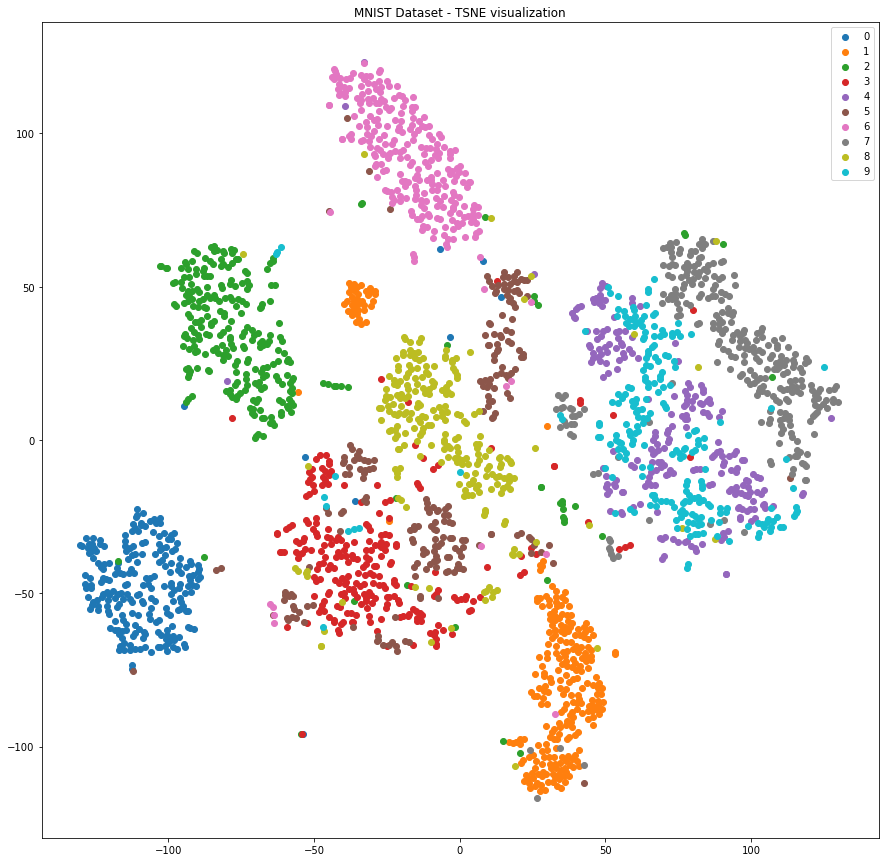

In [12]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
for l in set(sorted(labels_mnist)):
    plt.scatter(Y_mnist[labels_mnist == l, 0], Y_mnist[labels_mnist == l, 1])
    legend_list.append(str(l))
plt.title("MNIST Dataset - TSNE visualization")
plt.legend(legend_list)
plt.show()

## MNIST - Cluster Test

In [13]:
# For cluster test we need clusters of X that correspond to most pronounced Y clusters.
# In X we can safely assume .
# By hand: those are 0, two clusters for digit 1, 2, 3, etc.
# Digits 4, 5 and 9 do not correspond to well-pronounced clusters in Y area. Digit 1 correspond to two
# pronounced classes. Clusters for 3 and 8 are loosely defined, but we'll try anyway and see what happens.

centers_y_mnist = np.zeros((len(set(labels_mnist))+1,Y_mnist.shape[1]))
centers_x_mnist = np.zeros((len(set(labels_mnist))+1,X_mnist_raw.shape[1]))

# Pick 80% around center
percentage = 80
for l in sorted(set(labels_mnist)):
    picked_x = X_mnist_raw[labels_mnist == l, :]
    picked_y = Y_mnist[labels_mnist==l,:]
    x_center = np.mean(picked_x, axis=0)
    center_dist = np.sqrt(np.sum((picked_x - x_center)**2, axis=1))
    picked_y = picked_y[center_dist < np.percentile(center_dist, percentage), :]
    picked_x = picked_x[center_dist < np.percentile(center_dist, percentage), :]
    centers_x_mnist[l,:] = [np.mean(picked_x[:,i]) for i in range(X_mnist_raw.shape[1])]
    centers_y_mnist[l,:] = [np.mean(picked_y[:,i]) for i in range(Y_mnist.shape[1])]


l = 1
picked_x = X_mnist_raw[labels_mnist == l, :]
picked_y = Y_mnist[labels_mnist==l,:]
picked_x = picked_x[picked_y[:,1] > 40, :]
picked_y = picked_y[picked_y[:,1] > 40, :]

centers_x_mnist[-1,:] = [np.mean(picked_x[:,i]) for i in range(X_mnist_raw.shape[1])]
centers_y_mnist[-1,:] = [np.mean(picked_y[:,i]) for i in range(Y_mnist.shape[1])]

centers_x_mnist = np.delete(centers_x_mnist, [4,5,9], axis=0)
centers_y_mnist = np.delete(centers_y_mnist, [4,5,9], axis=0)

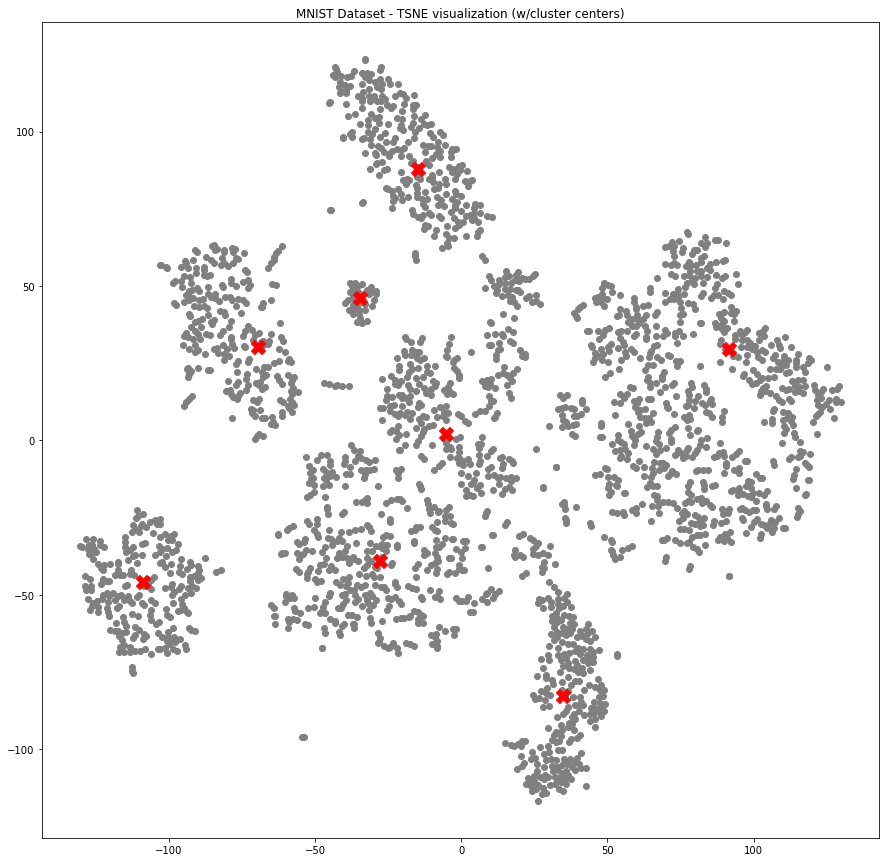

In [14]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
#for l in set(sorted(labels_mnist)):
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray')
#legend_list.append(str(l))
plt.scatter(centers_y_mnist[:,0], centers_y_mnist[:,1], c='red', marker='X', s=200)
plt.title("MNIST Dataset - TSNE visualization (w/cluster centers)")
#plt.legend(legend_list)
plt.show()

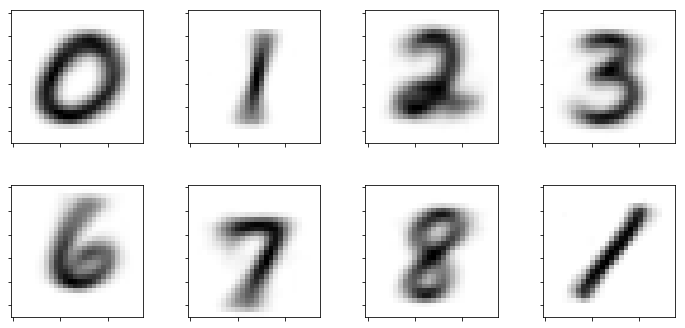

In [15]:
len_subplots = 4
height_subplots = int(np.ceil(len(centers_x_mnist) / len_subplots))
f, ax = plt.subplots(height_subplots,len_subplots)
f.set_size_inches(10,5)
f.tight_layout()
for i in range(len(centers_x_mnist)):
    ax[i//len_subplots][i%len_subplots].imshow(centers_x_mnist[i].reshape(28,28), cmap='gray_r')
    for l in ax[i//len_subplots][i%len_subplots].get_xticklabels():
        l.set_visible(False)
    for l in ax[i//len_subplots][i%len_subplots].get_yticklabels():
        l.set_visible(False)

In [16]:
len_subplots = 4
height_subplots = int(np.ceil(len(centers_x_mnist) / len_subplots))
height_subplots

2

In [17]:
emb_mnist_multiquadric = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'multiquadric'})
emb_mnist_linear = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'linear'})
emb_mnist_cubic = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'cubic'})
emb_mnist_quintic = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'quintic'})
emb_mnist_gaussian = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'gaussian'})
emb_mnist_inverse = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'inverse'})
emb_mnist_thin_plate = dTSNE_mnist.generate_embedding_function(embedding_function_type='rbf',
                                                                   function_kwargs={'function':'thin-plate'})

In [18]:
emb_mnist_idw20 = dTSNE_mnist.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                                                   function_kwargs={'power':20})
emb_mnist_idw2 = dTSNE_mnist.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                                                   function_kwargs={'power':2})
emb_mnist_idw1 = dTSNE_mnist.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                                                   function_kwargs={'power':1})
emb_mnist_idwhalf = dTSNE_mnist.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                                                   function_kwargs={'power':0.5})

In [19]:
centers_x_mnist_pca = mnist_pca.transform(centers_x_mnist)

centers_y_multiquadric = emb_mnist_multiquadric(centers_x_mnist_pca)
centers_y_cubic = emb_mnist_cubic(centers_x_mnist_pca)
centers_y_linear = emb_mnist_linear(centers_x_mnist_pca)
centers_y_quintic = emb_mnist_quintic(centers_x_mnist_pca)
centers_y_gaussian = emb_mnist_gaussian(centers_x_mnist_pca)
centers_y_inverse = emb_mnist_inverse(centers_x_mnist_pca)
centers_y_thin_plate = emb_mnist_thin_plate(centers_x_mnist_pca)

In [20]:
centers_y_idw2 = emb_mnist_idw2(centers_x_mnist_pca)
centers_y_idw20 = emb_mnist_idw20(centers_x_mnist_pca)
centers_y_idwhalf = emb_mnist_idwhalf(centers_x_mnist_pca)
centers_y_idw1 = emb_mnist_idw1(centers_x_mnist_pca)

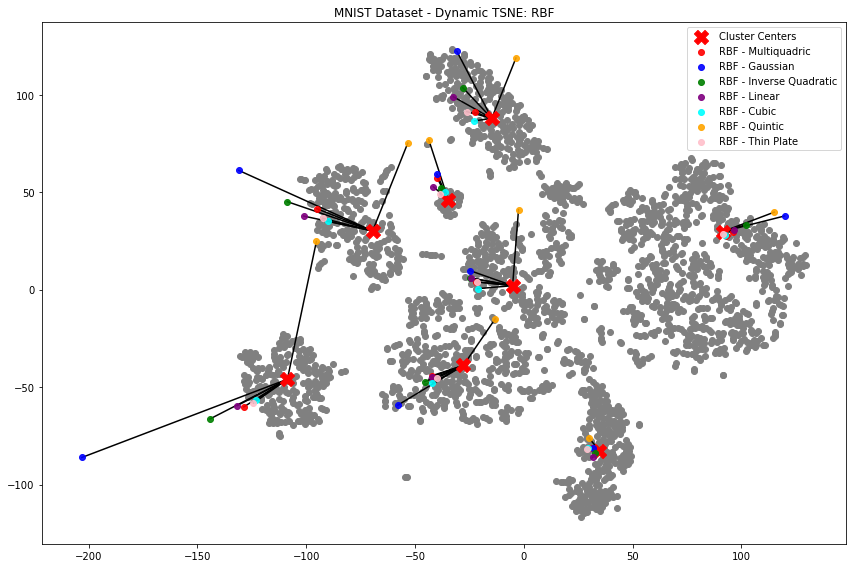

In [22]:
plt.gcf().set_size_inches(12,8)
legend_list = list()
#for l in set(sorted(labels_mnist)):

for l in range(len(centers_y_mnist)):
    plt.plot([centers_y_mnist[l,0], centers_y_multiquadric[l,0]],
             [centers_y_mnist[l,1], centers_y_multiquadric[l,1]], c='black', label=None, zorder=2)
    plt.plot([centers_y_mnist[l,0], centers_y_gaussian[l,0]],
             [centers_y_mnist[l,1], centers_y_gaussian[l,1]], c='black', label=None, zorder=2)
    plt.plot([centers_y_mnist[l,0], centers_y_linear[l,0]],
             [centers_y_mnist[l,1], centers_y_linear[l,1]], c='black', label=None, zorder=2)
    plt.plot([centers_y_mnist[l,0], centers_y_inverse[l,0]],
             [centers_y_mnist[l,1], centers_y_inverse[l,1]], c='black', label=None, zorder=2)
    plt.plot([centers_y_mnist[l,0], centers_y_cubic[l,0]],
             [centers_y_mnist[l,1], centers_y_cubic[l,1]], c='black', label=None, zorder=2)    
    plt.plot([centers_y_mnist[l,0], centers_y_quintic[l,0]],             
             [centers_y_mnist[l,1], centers_y_quintic[l,1]], c='black', label=None, zorder=2)
    plt.plot([centers_y_mnist[l,0], centers_y_thin_plate[l,0]],
             [centers_y_mnist[l,1], centers_y_thin_plate[l,1]], c='black', label=None, zorder=2)
    
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray', zorder=1, label=None)
#legend_list.append(str(l))
h1 = plt.scatter(centers_y_mnist[:,0], centers_y_mnist[:,1], c='red', marker='X', s=200, zorder=3)
h2 = plt.scatter(centers_y_multiquadric[:,0], centers_y_multiquadric[:,1], c='red', marker='o', zorder=3,alpha=0.9)
h3 = plt.scatter(centers_y_gaussian[:,0], centers_y_gaussian[:,1], c='blue', marker='o', zorder=3,alpha=0.9)
h4 = plt.scatter(centers_y_inverse[:,0], centers_y_inverse[:,1], c='green', marker='o', zorder=3,alpha=0.9)
h5 = plt.scatter(centers_y_linear[:,0], centers_y_linear[:,1], c='purple', marker='o', zorder=3,alpha=0.9)
h6 = plt.scatter(centers_y_cubic[:,0], centers_y_cubic[:,1], c='cyan', marker='o', zorder=3,alpha=0.9)
h7 = plt.scatter(centers_y_quintic[:,0], centers_y_quintic[:,1], c='orange', marker='o', zorder=3,alpha=0.9)
h8 = plt.scatter(centers_y_thin_plate[:,0], centers_y_thin_plate[:,1], c='pink', marker='o', zorder=3,alpha=0.9)

plt.title("MNIST Dataset - Dynamic TSNE: RBF")
plt.legend([h1,h2,h3,h4,h5,h6,h7,h8], ["Cluster Centers","RBF - Multiquadric","RBF - Gaussian",
                        "RBF - Inverse Quadratic","RBF - Linear",'RBF - Cubic','RBF - Quintic',
                        'RBF - Thin Plate'])
plt.tight_layout()
plt.savefig("cluster-test-RBF.png")
plt.show()

In [23]:
centers_y_gaussian

array([[-203.10019508,  -86.11913593],
       [  31.83168847,  -81.34620054],
       [-131.0170435 ,   61.18327827],
       [ -57.92633909,  -59.29715815],
       [ -30.7938885 ,  122.37529091],
       [ 119.90538739,   37.80914293],
       [ -24.76213965,    9.7759237 ],
       [ -39.94159919,   59.33225011]])

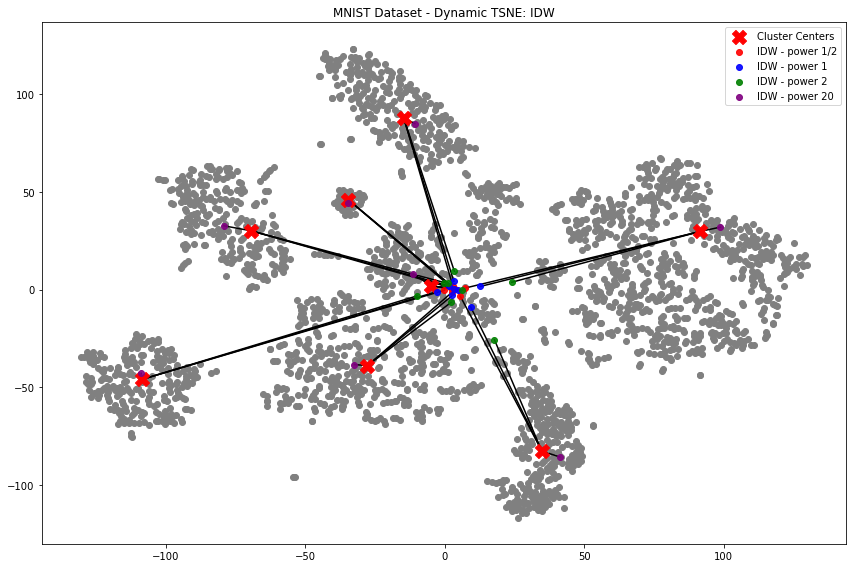

In [24]:
plt.gcf().set_size_inches(12,8)
legend_list = list()
#for l in set(sorted(labels_mnist)):

for l in range(len(centers_y_mnist)):
    plt.plot([centers_y_mnist[l,0], centers_y_idw20[l,0]],
             [centers_y_mnist[l,1], centers_y_idw20[l,1]], c='black', label=None, zorder=2)       
    plt.plot([centers_y_mnist[l,0], centers_y_idw2[l,0]],
             [centers_y_mnist[l,1], centers_y_idw2[l,1]], c='black', label=None, zorder=2)    
    plt.plot([centers_y_mnist[l,0], centers_y_idw1[l,0]],
             [centers_y_mnist[l,1], centers_y_idw1[l,1]], c='black', label=None, zorder=2)
    plt.plot([centers_y_mnist[l,0], centers_y_idwhalf[l,0]],
             [centers_y_mnist[l,1], centers_y_idwhalf[l,1]], c='black', label=None, zorder=2)   
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray', zorder=1, label=None)
#legend_list.append(str(l))
h1 = plt.scatter(centers_y_mnist[:,0], centers_y_mnist[:,1], c='red', marker='X', s=200, zorder=3)
h2 = plt.scatter(centers_y_idwhalf[:,0], centers_y_idwhalf[:,1], c='red', marker='o', zorder=3,alpha=0.9)
h3 = plt.scatter(centers_y_idw1[:,0], centers_y_idw1[:,1], c='blue', marker='o', zorder=3,alpha=0.9)
h4 = plt.scatter(centers_y_idw2[:,0], centers_y_idw2[:,1], c='green', marker='o', zorder=3,alpha=0.9)
h5 = plt.scatter(centers_y_idw20[:,0], centers_y_idw20[:,1], c='purple', marker='o', zorder=3,alpha=0.9)

plt.title("MNIST Dataset - Dynamic TSNE: IDW")
plt.legend([h1,h2,h3,h4,h5], ["Cluster Centers",'IDW - power 1/2','IDW - power 1','IDW - power 2','IDW - power 20'])
plt.tight_layout()
plt.savefig("cluster-test-IDW.png")
plt.show()

In [25]:
# TODO get each of those plots in a grid with common legend
np.random.seed(0)
idx_list = [np.random.randint(2000) for i in range(10)]
nearest_neighbor_list = list()
for idx in idx_list:
    nearest_neighbor_idx = np.argsort(np.sum((X_mnist - X_mnist[idx,:])**2, axis=1))[1]
    nearest_neighbor_list.append(nearest_neighbor_idx)
print(idx_list)
print(nearest_neighbor_list)

[684, 559, 1653, 1216, 835, 763, 1731, 1383, 1033, 1747]
[634, 395, 1638, 1944, 844, 1457, 1909, 1976, 1060, 1789]


In [26]:
transition_list = list()
list_multiquadric = list()
list_cubic = list()
list_linear = list()
list_quintic = list()
list_gaussian = list()
list_inverse = list()
list_thin_plate = list()
list_idw1 = list()
list_idwhalf = list()
list_idw2 = list()
list_idw20 = list()
steps = 100

for i in range(len(idx_list)):
    Xtransition = [X_mnist[idx_list[i], :] + (X_mnist[nearest_neighbor_list[i], :] - X_mnist[idx_list[i], :])*j/steps for j in range(steps+1)]
    transition_list.append(Xtransition)
    list_multiquadric.append(emb_mnist_multiquadric(Xtransition))
    list_cubic.append(emb_mnist_cubic(Xtransition))
    list_linear.append(emb_mnist_linear(Xtransition))
    list_quintic.append(emb_mnist_quintic(Xtransition))
    list_gaussian.append(emb_mnist_gaussian(Xtransition))
    list_inverse.append(emb_mnist_inverse(Xtransition))
    list_thin_plate.append(emb_mnist_thin_plate(Xtransition))
    list_idw1.append(emb_mnist_idw1(Xtransition))
    list_idwhalf.append(emb_mnist_idwhalf(Xtransition))
    list_idw2.append(emb_mnist_idw2(Xtransition))
    list_idw20.append(emb_mnist_idw20(Xtransition))

/Users/andrey.boytsov/Workspaces/DynamicTSNE/dynamic_tsne.py:654: RuntimeWarning: overflow encountered in true_divide
  weights = 1/distances**power
/Users/andrey.boytsov/Workspaces/DynamicTSNE/dynamic_tsne.py:655: RuntimeWarning: invalid value encountered in true_divide
  weights = weights/np.sum(weights)
/Users/andrey.boytsov/Workspaces/DynamicTSNE/dynamic_tsne.py:654: RuntimeWarning: divide by zero encountered in true_divide
  weights = 1/distances**power


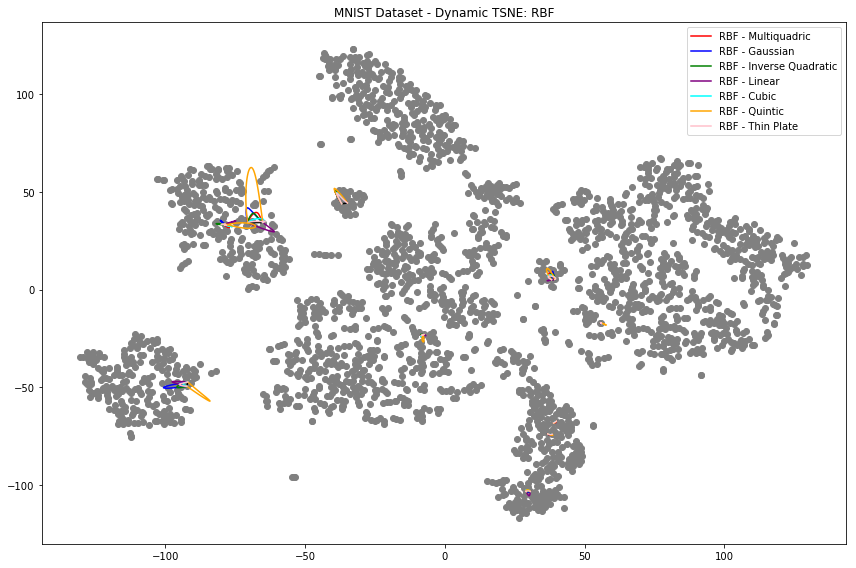

In [27]:
plt.gcf().set_size_inches(12,8)
legend_list = list()
#for l in set(sorted(labels_mnist)):

for l in range(len(idx_list)):
    plt.plot([Y_mnist[idx_list[l],0], Y_mnist[nearest_neighbor_list[l],0]],
             [Y_mnist[idx_list[l],1], Y_mnist[nearest_neighbor_list[l],1]], c='black', label=None, zorder=2)
    h1, = plt.plot(list_multiquadric[l][:,0], list_multiquadric[l][:,1], c='red', zorder=3)
    h2, = plt.plot(list_gaussian[l][:,0], list_gaussian[l][:,1], c='blue', zorder=3)
    h3, = plt.plot(list_inverse[l][:,0], list_inverse[l][:,1], c='green', zorder=3)
    h4, = plt.plot(list_linear[l][:,0], list_linear[l][:,1], c='purple', zorder=3)
    h5, = plt.plot(list_cubic[l][:,0], list_cubic[l][:,1], c='cyan', zorder=3)
    h6, = plt.plot(list_quintic[l][:,0], list_quintic[l][:,1], c='orange', zorder=3)
    h7, = plt.plot(list_thin_plate[l][:,0], list_thin_plate[l][:,1], c='pink', zorder=3)     
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray', zorder=1, label=None)

plt.title("MNIST Dataset - Dynamic TSNE: RBF")
plt.legend([h1,h2,h3,h4,h5,h6,h7], ["RBF - Multiquadric","RBF - Gaussian",
                        "RBF - Inverse Quadratic","RBF - Linear",'RBF - Cubic','RBF - Quintic',
                        'RBF - Thin Plate'])
plt.tight_layout()
plt.savefig("continuity-test-RBF.png")
plt.show()

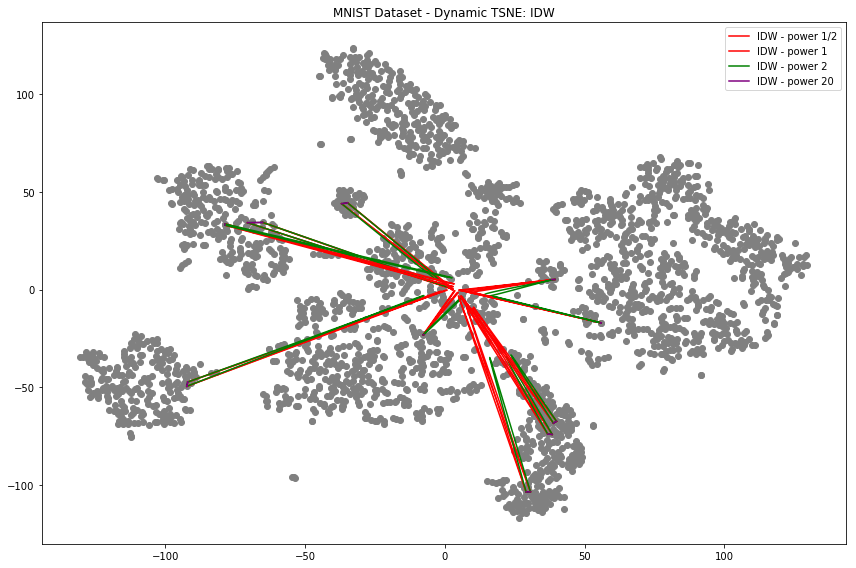

In [28]:
plt.gcf().set_size_inches(12,8)
legend_list = list()
#for l in set(sorted(labels_mnist)):

for l in range(len(idx_list)):
    plt.plot([Y_mnist[idx_list[l],0], Y_mnist[nearest_neighbor_list[l],0]],
             [Y_mnist[idx_list[l],1], Y_mnist[nearest_neighbor_list[l],1]], c='black', label=None, zorder=2)
    h1, = plt.plot(list_idwhalf[l][:,0], list_idwhalf[l][:,1], c='red', zorder=3)
    h2, = plt.plot(list_idw1[l][:,0], list_idw1[l][:,1], c='red', zorder=3)
    h3, = plt.plot(list_idw2[l][:,0], list_idw2[l][:,1], c='green', zorder=3)
    h4, = plt.plot(list_idw20[l][:,0], list_idw20[l][:,1], c='purple', zorder=3)    
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray', zorder=1, label=None)

plt.title("MNIST Dataset - Dynamic TSNE: IDW")
plt.legend([h1,h2,h3,h4], ['IDW - power 1/2','IDW - power 1','IDW - power 2','IDW - power 20'])
plt.tight_layout()
plt.savefig("continuity-test-IDW.png")
plt.show()

In [29]:
# TODO get each of those plots in a grid with common legend
np.random.seed(15)
idx1_list = [np.random.randint(2000) for i in range(5)]
idx2_list = [np.random.randint(2000) for i in range(len(idx1_list))]



In [30]:
t_transition_list = list()
t_transition_raw_list = list()
t_list_multiquadric = list()
t_list_cubic = list()
t_list_linear = list()
t_list_quintic = list()
t_list_gaussian = list()
t_list_inverse = list()
t_list_thin_plate = list()
t_list_idw1 = list()
t_list_idwhalf = list()
t_list_idw2 = list()
t_list_idw20 = list()
steps = 100

for i in range(len(idx1_list)):
    Xtransition = [X_mnist[idx1_list[i], :] + (X_mnist[idx2_list[i], :] - X_mnist[idx1_list[i], :])*j/steps for j in range(steps+1)]
    X_raw_transition = [X_mnist_raw[idx1_list[i], :] + (X_mnist_raw[idx2_list[i], :] - X_mnist_raw[idx1_list[i], :])*j/steps for j in range(steps+1)]
    t_transition_list.append(Xtransition)
    t_transition_raw_list.append(X_raw_transition)
    t_list_multiquadric.append(emb_mnist_multiquadric(Xtransition))
    t_list_cubic.append(emb_mnist_cubic(Xtransition))
    t_list_linear.append(emb_mnist_linear(Xtransition))
    t_list_quintic.append(emb_mnist_quintic(Xtransition))
    t_list_gaussian.append(emb_mnist_gaussian(Xtransition))
    t_list_inverse.append(emb_mnist_inverse(Xtransition))
    t_list_thin_plate.append(emb_mnist_thin_plate(Xtransition))
    t_list_idw1.append(emb_mnist_idw1(Xtransition))
    t_list_idwhalf.append(emb_mnist_idwhalf(Xtransition))
    t_list_idw2.append(emb_mnist_idw2(Xtransition))
    t_list_idw20.append(emb_mnist_idw20(Xtransition))

/Users/andrey.boytsov/Workspaces/DynamicTSNE/dynamic_tsne.py:654: RuntimeWarning: overflow encountered in true_divide
  weights = 1/distances**power
/Users/andrey.boytsov/Workspaces/DynamicTSNE/dynamic_tsne.py:655: RuntimeWarning: invalid value encountered in true_divide
  weights = weights/np.sum(weights)


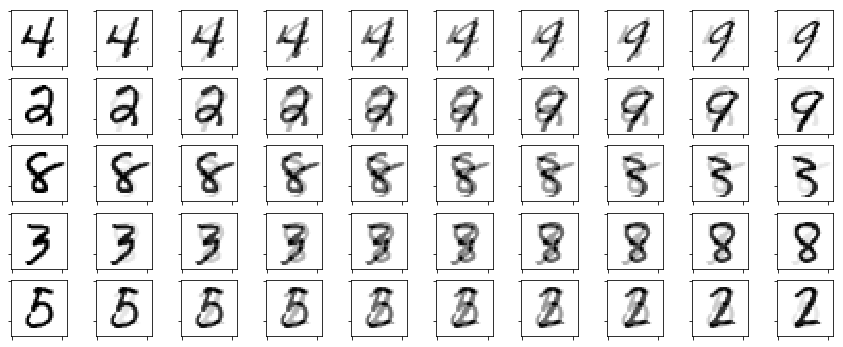

In [31]:
len_subplots = 10
height_subplots = len(t_transition_list)
f, ax = plt.subplots(height_subplots,len_subplots)
f.set_size_inches(15,6)
#f.tight_layout()
f.subplots_adjust()
for i in range(len(t_transition_list)):
    for j in range(len_subplots):
        ax[i][j].imshow(t_transition_raw_list[i][j*steps//len_subplots].reshape(28,28), cmap='gray_r')
        for l in ax[i][j].get_xticklabels():
            l.set_visible(False)
        for l in ax[i][j].get_yticklabels():
            l.set_visible(False)
f.savefig("transition-examples.png")

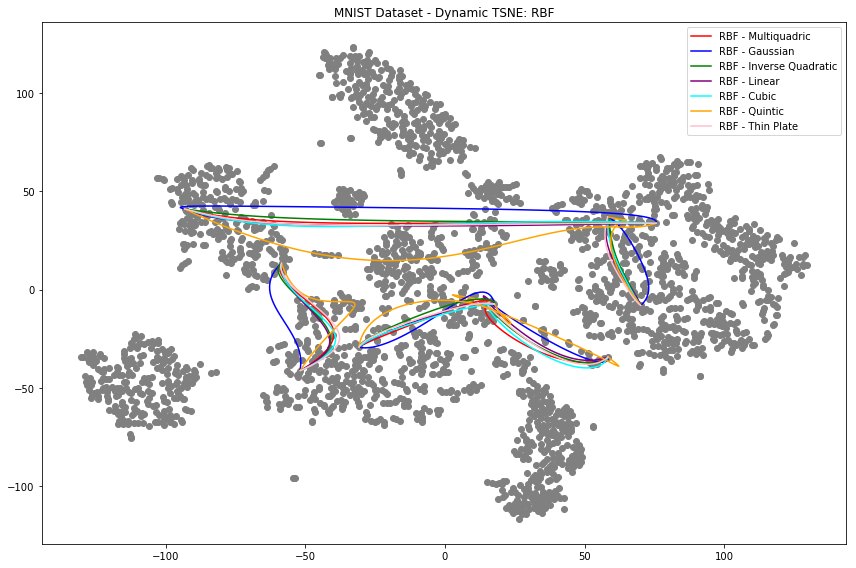

In [32]:
plt.gcf().set_size_inches(12,8)
legend_list = list()
#for l in set(sorted(labels_mnist)):

for l in range(len(idx1_list)):
    #plt.plot([Y_mnist[idx_list1[l],0], Y_mnist[idx_list2[l],0]],
    #         [Y_mnist[idx_list1[l],1], Y_mnist[idx_list2[l],1]], c='black', label=None, zorder=2)
    h1, = plt.plot(t_list_multiquadric[l][:,0], t_list_multiquadric[l][:,1], c='red', zorder=3)
    h2, = plt.plot(t_list_gaussian[l][:,0], t_list_gaussian[l][:,1], c='blue', zorder=3)
    h3, = plt.plot(t_list_inverse[l][:,0], t_list_inverse[l][:,1], c='green', zorder=3)
    h4, = plt.plot(t_list_linear[l][:,0], t_list_linear[l][:,1], c='purple', zorder=3)
    h5, = plt.plot(t_list_cubic[l][:,0], t_list_cubic[l][:,1], c='cyan', zorder=3)
    h6, = plt.plot(t_list_quintic[l][:,0], t_list_quintic[l][:,1], c='orange', zorder=3)
    h7, = plt.plot(t_list_thin_plate[l][:,0], t_list_thin_plate[l][:,1], c='pink', zorder=3)     
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray', zorder=1, label=None)

plt.title("MNIST Dataset - Dynamic TSNE: RBF")
plt.legend([h1,h2,h3,h4,h5,h6,h7], ["RBF - Multiquadric","RBF - Gaussian",
                        "RBF - Inverse Quadratic","RBF - Linear",'RBF - Cubic','RBF - Quintic',
                        'RBF - Thin Plate'])
plt.tight_layout()
plt.savefig("transition-test-RBF.png")
plt.show()

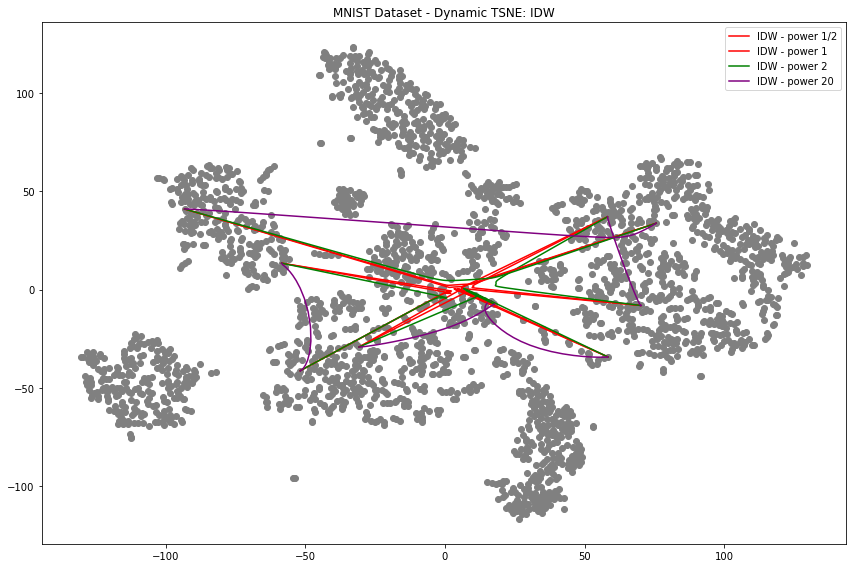

In [33]:
plt.gcf().set_size_inches(12,8)
legend_list = list()
#for l in set(sorted(labels_mnist)):

for l in range(len(idx1_list)):
    #plt.plot([Y_mnist[idx1_list[l],0], Y_mnist[idx2_list[l],0]],
    #         [Y_mnist[idx1_list[l],1], Y_mnist[idx2_list[l],1]], c='black', label=None, zorder=2)
    h1, = plt.plot(t_list_idwhalf[l][:,0], t_list_idwhalf[l][:,1], c='red', zorder=3)
    h2, = plt.plot(t_list_idw1[l][:,0], t_list_idw1[l][:,1], c='red', zorder=3)
    h3, = plt.plot(t_list_idw2[l][:,0], t_list_idw2[l][:,1], c='green', zorder=3)
    h4, = plt.plot(t_list_idw20[l][:,0], t_list_idw20[l][:,1], c='purple', zorder=3)    
plt.scatter(Y_mnist[:, 0], Y_mnist[:, 1], c= 'gray', zorder=1, label=None)

plt.title("MNIST Dataset - Dynamic TSNE: IDW")
plt.legend([h1,h2,h3,h4], ['IDW - power 1/2','IDW - power 1','IDW - power 2','IDW - power 20'])
plt.tight_layout()
plt.savefig("transition-test-IDW.png")
plt.show()

In [34]:
Xfar = [100]*30
print("Multiquadric", emb_mnist_multiquadric(Xfar))
print("Cubic", emb_mnist_cubic(Xfar))
print("Linear", emb_mnist_linear(Xfar))
print("Quintic", emb_mnist_quintic(Xfar))
print("Gaussian", emb_mnist_gaussian(Xfar))
print("Inverse", emb_mnist_inverse(Xfar))
print("Thin plate", emb_mnist_thin_plate(Xfar))
print("IDW1", emb_mnist_idw1(Xfar))
print("IDW0.5", emb_mnist_idwhalf(Xfar))
print("IDW2", emb_mnist_idw2(Xfar))
print("IDW20", emb_mnist_idw20(Xfar))

Multiquadric [[ 108.99983576 -256.11232982]]
Cubic [[-1462319.69774508 -2374375.83477807]]
Linear [[ 1059.66677378   182.70274008]]
Quintic [[  5.03769197e+10   4.05521382e+11]]
Gaussian [[ 0.  0.]]
Inverse [[-0.03546407  0.01867099]]
Thin plate [[ 235194.03366005   11139.12160885]]
IDW1 [[ 2.23882646  0.26343976]]
IDW0.5 [[ 2.23912472  0.24574634]]
IDW2 [[ 2.23821045  0.29883257]]
IDW20 [[ 2.22274383  0.93729505]]


In [37]:
# Run TSNE
dTSNE_mnist2 = dynamic_tsne.DynamicTSNE(perplexity=30)

exclude_sample = 100
print("Excluded point: ", exclude_sample)
X_mnist2 = X_mnist[range(len(X_mnist)) != exclude_sample,:]
starting_Y_mnist2 = X_mnist[range(len(X_mnist)) != exclude_sample,:]

Y_mnist2 = dTSNE_mnist.fit(X_mnist, optimizer_kwargs={'momentum': 0.8, 'n_iter': 3000,
                                                     'early_exaggeration' : None},
                           starting_y = Y_mnist, random_seed=1, verbose=2)

Found sigma. Average:  1.44087912976
[t-SNE] Iteration 1: error = 1.1164325, gradient norm = 0.0000073
[t-SNE] Iteration 2: error = 1.1164324, gradient norm = 0.0000064
[t-SNE] Iteration 2: error difference 0.000000. Finished.


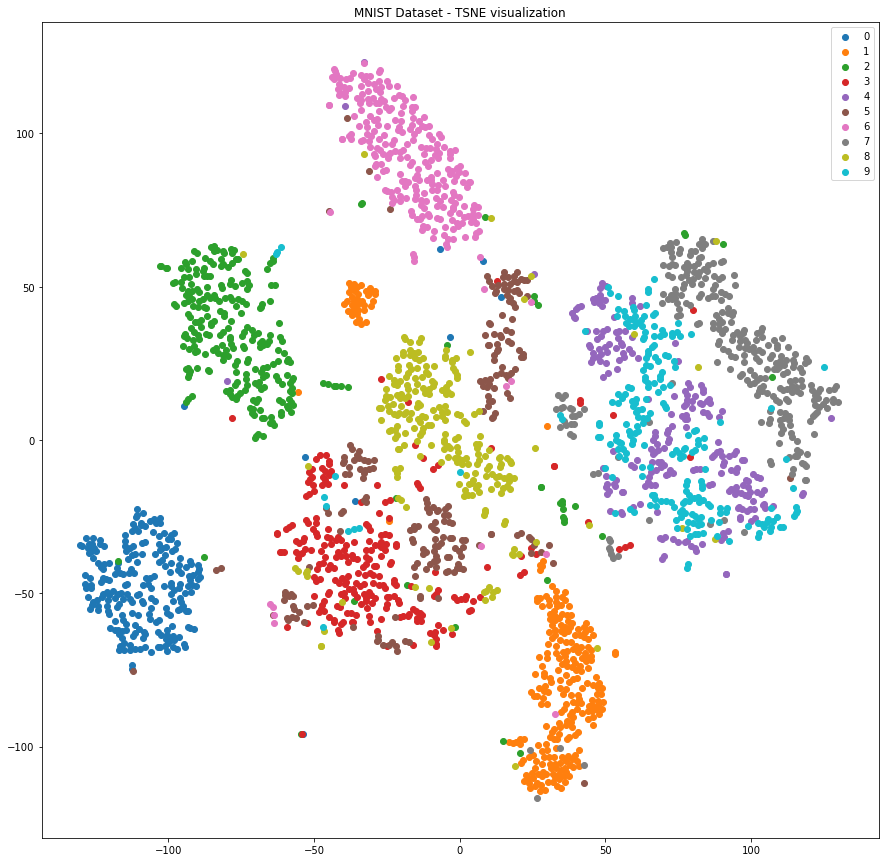

In [38]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
for l in set(sorted(labels_mnist)):
    plt.scatter(Y_mnist[labels_mnist == l, 0], Y_mnist[labels_mnist == l, 1])
    legend_list.append(str(l))
plt.title("MNIST Dataset - TSNE visualization")
plt.legend(legend_list)
plt.show()